In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from pmdarima import auto_arima


In [2]:
df=pd.read_csv('C:/Users/wasan/Documents/Final Edition/Weather Data Set/Univariate/Kiriwaneliya_project.csv')
df.head()



FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/wasan/Documents/Final Edition/Weather Data Set/Univariate/Kiriwaneliya_project.csv'

In [ ]:
temperature_min=df[["Time","Temp_min"]]
temperature_min.head()

In [ ]:
#removing missing values
df=temperature_min.dropna(how="any")

In [ ]:
#Creating time column
temperature_min['Time'] = pd.to_datetime(temperature_min['Time'])

In [ ]:
#Checking for missing values
temperature_min.isna().sum()

In [ ]:
#removing missing values
temp=temperature_min.dropna(how="any")
temp.head()

In [ ]:
temp.set_index('Time',inplace=True)

In [ ]:
temp.plot(figsize=(12,5))

It can't be seen a clear trend.But there is some evidence for seasonality.

In [3]:
### ADF Test
test_result=adfuller(temp['temperature_min'])
#Ho: The series is non stationary
#H1: The series is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(temp['temperature_min'])

NameError: name 'temp' is not defined

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(temp['Tempurature'])

In [14]:
#PhillipsPerron Test
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(temp['Tempurature'].astype(float))
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.125
P-value                         0.001
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


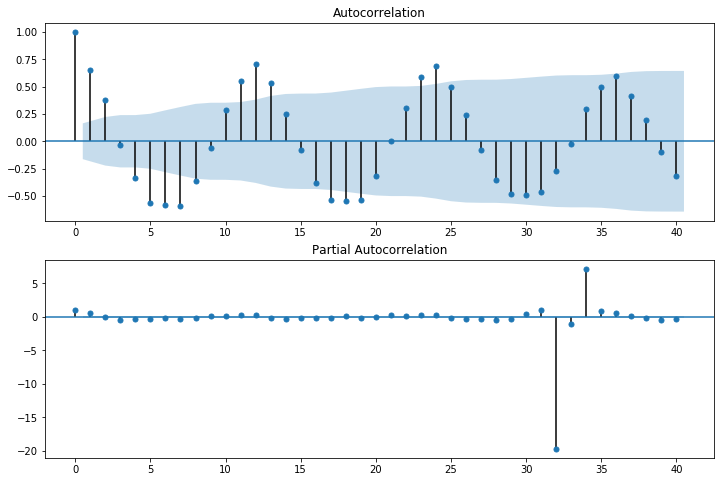

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp['Tempurature'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp['Tempurature'],lags=40,ax=ax2)

# Get an advice from sir

PACF shows an abnormal behavior. I feel here it is better to go with machine learning rather than classical method.